# Indici corretti

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

## Lettura dati

In [2]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 234
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-10-14T17:00:00


In [3]:
# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

## Relazione fra tamponi e numero di positivi correnti

In [4]:
ratio_tamp_attpos=[trend['tamponi_giornalieri']['Italia'][i]/trend['totale_positivi']['Italia'][i] for i in range(len(giorni))]
smooth_ratio_tamp_attpos=moving_function_rev1(ratio_tamp_attpos,np.nanmean,5,5)

[Text(0, 0, '2020-02-24T18:00:00'),
 Text(0, 0, '2020-03-25T17:00:00'),
 Text(0, 0, '2020-04-24T17:00:00'),
 Text(0, 0, '2020-05-24T17:00:00'),
 Text(0, 0, '2020-06-23T17:00:00'),
 Text(0, 0, '2020-07-23T17:00:00'),
 Text(0, 0, '2020-08-22T17:00:00'),
 Text(0, 0, '2020-09-21T17:00:00')]

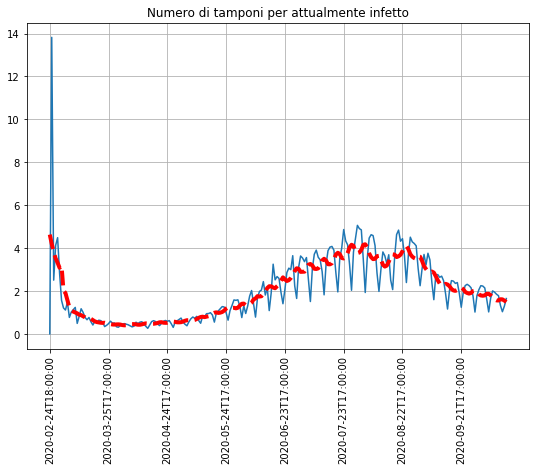

In [5]:
fig,ax=plt.subplots(1,figsize=figsize_single)
ax.plot(ratio_tamp_attpos)
ax.plot(smooth_ratio_tamp_attpos,'r--',linewidth=4)
ax.grid()
ax.set_title('Numero di tamponi per attualmente infetto')
ax.set_xticks(list(range(0,len(giorni),30)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),30))],rotation=90)

## Normalizzazione

Si ricalcola il numero di positivi giornalieri in base a valori normalizzati di tamponi effettuati *T* e rate % di tamposi positivi *p*.

**Assunzioni:**

- *T* = att_positivi * K
    > K=50 percentile del rapporto fra tamponi giornalieri effettuati e attualmente positivi (*smoothed*)
- *p* = media dei valori nell'ultimo mese


In [6]:
K=np.percentile(smooth_ratio_tamp_attpos,50)
print('k = %.1f'%K)

k = 1.9


In [7]:
ave_p=moving_function_rev1(trend['perc_tamponi_positivi']['Italia'],np.nanmedian,15,15)
tamponi_effettuati_corr=K*trend['totale_positivi']['Italia']


[Text(0, 0, '2020-02-24T18:00:00'),
 Text(0, 0, '2020-03-25T17:00:00'),
 Text(0, 0, '2020-04-24T17:00:00'),
 Text(0, 0, '2020-05-24T17:00:00'),
 Text(0, 0, '2020-06-23T17:00:00'),
 Text(0, 0, '2020-07-23T17:00:00'),
 Text(0, 0, '2020-08-22T17:00:00'),
 Text(0, 0, '2020-09-21T17:00:00')]

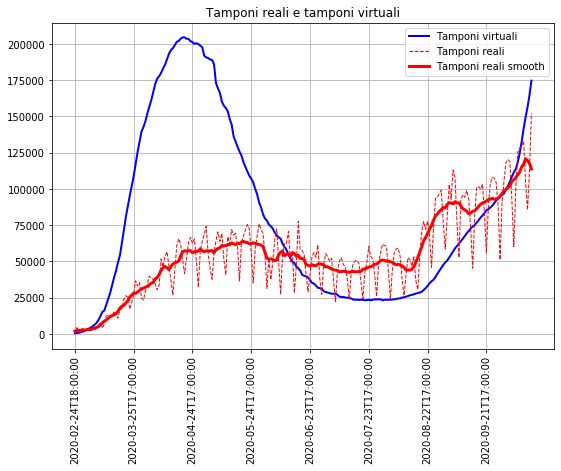

In [8]:
fig,ax=plt.subplots(1,figsize=figsize_single)
ax.plot(tamponi_effettuati_corr,'b-',label='Tamponi virtuali',linewidth=2)
ax.plot(trend['tamponi_giornalieri']['Italia'],'r--',linewidth=1,label='Tamponi reali')
ax.plot(moving_function_rev1(trend['tamponi_giornalieri']['Italia'],np.mean,3,3),'r-',linewidth=3,label='Tamponi reali smooth')
ax.grid()
ax.set_title('Tamponi reali e tamponi virtuali')
ax.legend()
ax.set_xticks(list(range(0,len(giorni),30)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),30))],rotation=90)

In [ ]:
nuovi_pos_corr=[0.01*ave_p[i]*tamponi_effettuati[i] for i in range(len(giorni))]

[Text(0, 0, '2020-02-24T18:00:00'),
 Text(0, 0, '2020-03-25T17:00:00'),
 Text(0, 0, '2020-04-24T17:00:00'),
 Text(0, 0, '2020-05-24T17:00:00'),
 Text(0, 0, '2020-06-23T17:00:00'),
 Text(0, 0, '2020-07-23T17:00:00'),
 Text(0, 0, '2020-08-22T17:00:00'),
 Text(0, 0, '2020-09-21T17:00:00')]

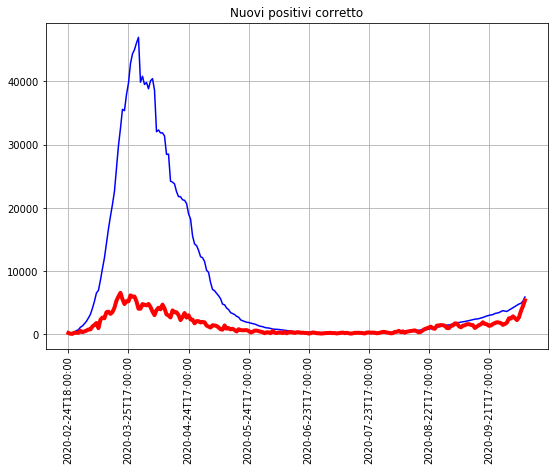

In [57]:
fig,ax=plt.subplots(1,figsize=figsize_single)
ax.plot(nuovi_pos_corr,'b-')
ax.plot(trend['nuovi_positivi']['Italia'],'r-',linewidth=4)
ax.grid()
ax.set_title('Nuovi positivi corretto')
ax.set_xticks(list(range(0,len(giorni),30)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),30))],rotation=90)